In [8]:
# Setup that is necessary for jupyter notebook to find sibling-directories
# see: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [59]:
# FROM i2dl for nice setup
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# Imports for this notebook

from networks.baseline import BaselineModel
from training.solver import Solver
from training.dataloader import FaceForensicsVideosDataset, ToTensor
from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler
import torch

In [54]:
data_location = ["/mnt/c/Users/admin/Desktop/FaceForensics/original_sequences/youtube/c40/sequences",
                 "/mnt/c/Users/admin/Desktop/FaceForensics/manipulated_sequences/Deepfakes/c40/sequences"]
dataset = FaceForensicsVideosDataset(data_location, generate_coupled=False, transform=ToTensor())

480
120


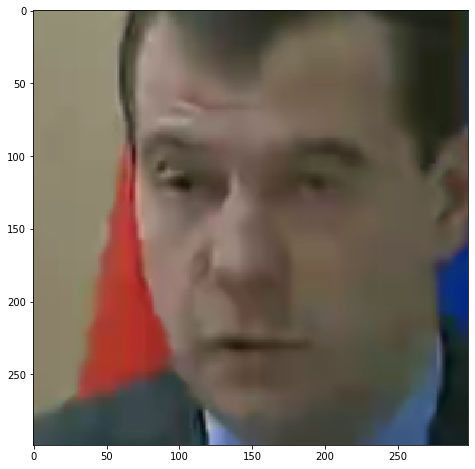

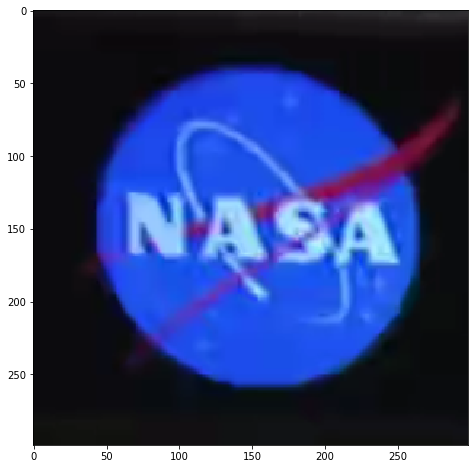

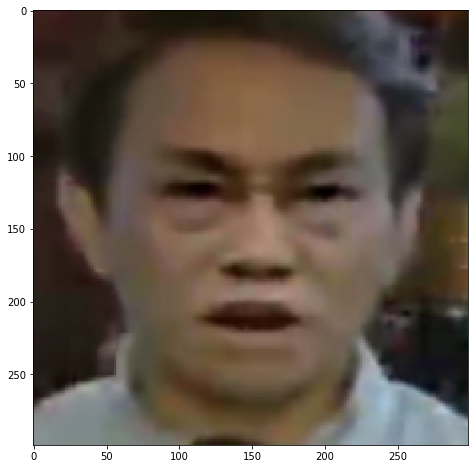

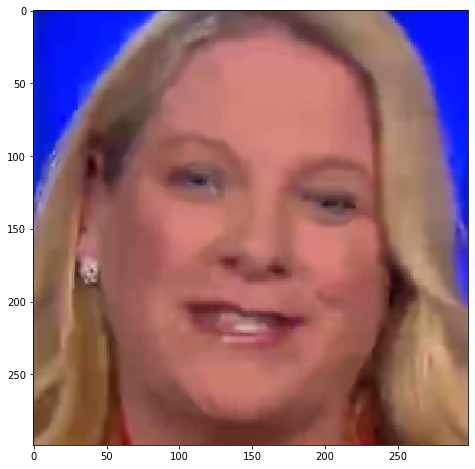

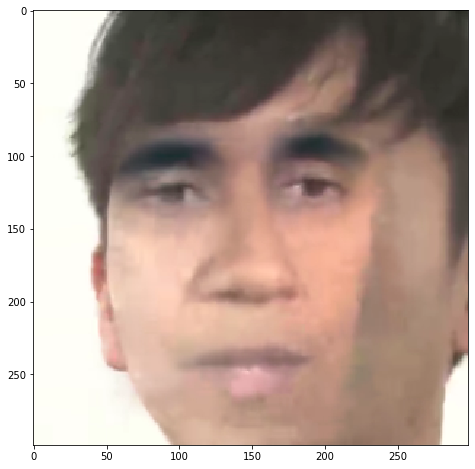

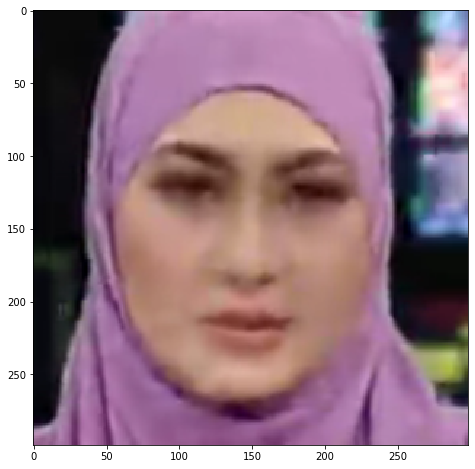

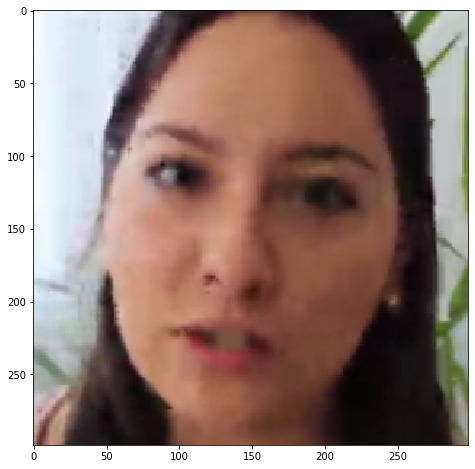

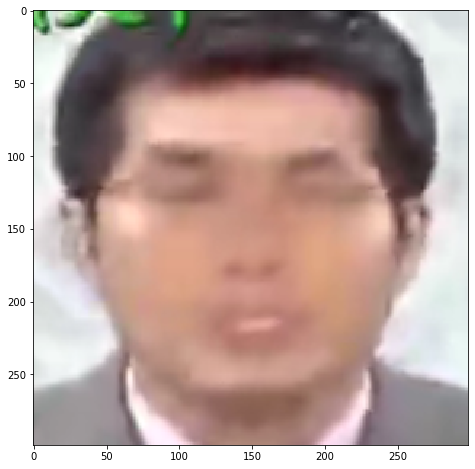

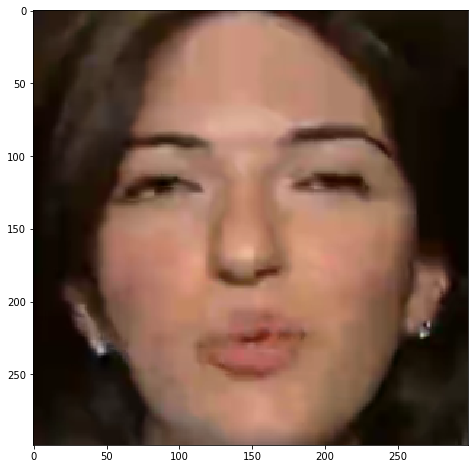

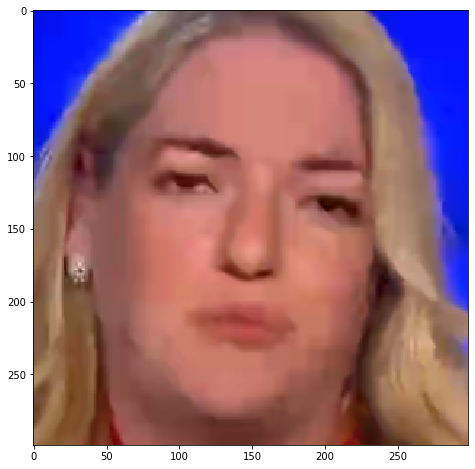

KeyboardInterrupt: 

In [67]:
# from: https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets

batch_size = 1
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

print(len(train_loader))
print(len(validation_loader))

for i, sample in enumerate(train_loader):
    
    #print("count of sequences in this batch: {}".format(sample["images"][0].shape[0]))
    
    sequence = sample["images"][0][0, :, :, :, :]
    labels_for_sequence = sample["labels"]
    #print(labels_for_sequence)
    
    #print(sequence.shape)
    #img = sequence[0].numpy()
    #img = np.moveaxis(img, 0, -1)  
    #plt.imshow(img)
    #plt.show()
    
    
    #print(sample["images"][0].shape)
    #print(sample["labels"][0].shape)

In [48]:
# Load baseline model and configurate solver
model = BaselineModel(model_choice='xception', num_out_classes=2, dropout=0.0)
model.train_only_last_layer()

solver = Solver()

In [ ]:
'''
print(dataset.__len__())
print(dataset.shape)
train_dataset = dataset[:20]
val_dataset = dataset[20:]

print(train_dataset.__len__())
print(val_dataset.__len__())


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4)

#for i, sample in enumerate(train_loader):
#    print(sample["images"][0].shape)
#    print(sample["labels"][0].shape)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=True, num_workers=4)

#solver.train(model, train_loader, val_loader, num_epochs=2, log_nth=1000)
'''

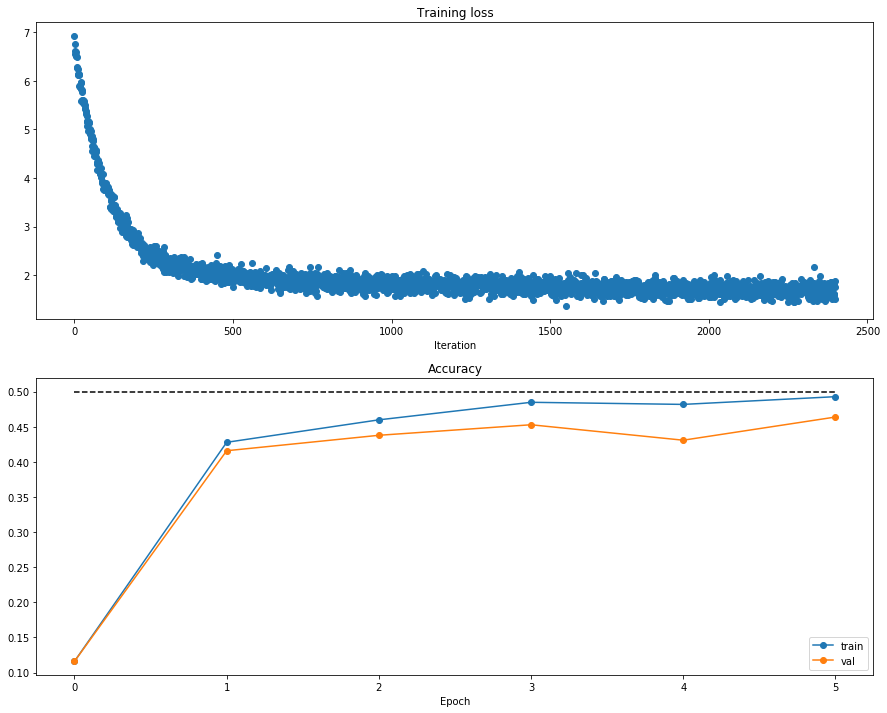

In [101]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

## Test your model
Run your best model on the validation and test sets. You should achieve score of above __50%__ accuracy on the validation set.

In [31]:
X_test = data['X_test']
X_val = data['X_val']
y_val = data['y_val']
y_test = data['y_test']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print('Validation set accuracy: ', (y_val_pred == y_val).mean())
print('Test set accuracy: ', (y_test_pred == y_test).mean())

Validation set accuracy:  0.553
Test set accuracy:  0.567
